# **Capstone Project** (CC25-CF254)

**Mindfulness**

Mindfulness is a chatbot application designed to help college students recognize their emotional codition. This chatbot can ask questions about mood, sleep patterns, stress level, and their daily activities.

## **Import All Packages/Library dan Install package**



In [1]:
# Pasang paket yang dibutuhkan
!pip install PySastrawi  # Pasang PySastrawi untuk stemming bahasa Indonesia
!pip install transformers[torch] faiss-cpu sentencepiece datasets  # Pasang transformers untuk NLP modern
!pip install tensorflow  # Pasang tensorflow untuk deep learning
!pip install nltk  # Pasang nltk untuk natural language toolkit
!pip install sentencepiece  # Pasang sentencepiece untuk tokenisasi
!pip install scikit-learn  # Pasang scikit-learn untuk machine learning
!pip install firebase-admin
!pip install faiss-cpu

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import re
import string
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from transformers import AutoTokenizer, TFAutoModel, AutoModel
import torch
import faiss
import pandas as pd
import requests
import csv
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
from collections import defaultdict
import os
import time
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Dataset**

### **Show Dataset**

In [2]:
# Muat dataset
data = pd.read_csv('/content/translated_train.csv')

# Fungsi preprocess teks
def preprocess_text(text):
    # Cek apakah input adalah string sebelum diproses
    if isinstance(text, str):
        # Ubah jadi huruf kecil semua
        text = text.lower()
        # Hilangkan tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Hilangkan angka
        text = re.sub(r'\d+', '', text)
        # Tokenisasi dan hilangkan stopword bahasa Indonesia
        stop_words = set(stopwords.words('indonesian'))
        words = word_tokenize(text)
        text = ' '.join([word for word in words if word not in stop_words])
        return text
    else:
        # Jika bukan string, bisa kembalikan string kosong atau NaN
        return ''  # atau pd.NA

# Terapkan preprocessing pada kolom context dan response
data['processed_context'] = data['translated_context'].apply(preprocess_text)
data['processed_response'] = data['translated_response'].apply(preprocess_text)

# Tampilkan data hasil preprocessing
data[['translated_context', 'processed_context', 'translated_response', 'processed_response']].head()


,translated_context,processed_context,translated_response,processed_response
0,Saya mengalami beberapa hal dengan perasaan da...,mengalami perasaan tidur memikirkan berharga m...,"Jika semua orang berpikir Anda tidak berharga,...",orang berpikir berharga menemukan orang bergau...
1,Saya mengalami beberapa hal dengan perasaan da...,mengalami perasaan tidur memikirkan berharga m...,"Halo, dan terima kasih atas pertanyaan Anda da...",halo terima kasih mencari nasihat perasaan ber...
2,Saya mengalami beberapa hal dengan perasaan da...,mengalami perasaan tidur memikirkan berharga m...,Hal pertama yang saya sarankan adalah mendapat...,sarankan tidur butuhkan memengaruhi berpikir m...
3,Saya mengalami beberapa hal dengan perasaan da...,mengalami perasaan tidur memikirkan berharga m...,Terapi sangat penting bagi mereka yang merasa ...,terapi depresi berharga mengalami kekhawatiran...
4,Saya mengalami beberapa hal dengan perasaan da...,mengalami perasaan tidur memikirkan berharga m...,Pertama -tama saya ingin memberi tahu Anda bah...,tama perasaan membantu mengubah perasaan mengu...


In [3]:
# Membuat DataFrame
df_terjemahan = data.copy()

### **Translate Dataset**

In [4]:
# Isi nilai kosong (NaN) di kolom 'translated_response' dengan kalimat default
data['translated_response'].fillna("Sorry, I have no answer for this.", inplace=True)

# Hapus data duplikat berdasarkan kolom 'processed_context' dan 'processed_response', lalu reset index
data = data.drop_duplicates(subset=['processed_context', 'processed_response']).reset_index(drop=True)

df_terjemahan.head()

<ipython-input-4-555191bc6562>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['translated_response'].fillna("Sorry, I have no answer for this.", inplace=True)


,Context,Response,translated_context,translated_response,processed_context,processed_response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Saya mengalami beberapa hal dengan perasaan da...,"Jika semua orang berpikir Anda tidak berharga,...",mengalami perasaan tidur memikirkan berharga m...,orang berpikir berharga menemukan orang bergau...
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Saya mengalami beberapa hal dengan perasaan da...,"Halo, dan terima kasih atas pertanyaan Anda da...",mengalami perasaan tidur memikirkan berharga m...,halo terima kasih mencari nasihat perasaan ber...
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Saya mengalami beberapa hal dengan perasaan da...,Hal pertama yang saya sarankan adalah mendapat...,mengalami perasaan tidur memikirkan berharga m...,sarankan tidur butuhkan memengaruhi berpikir m...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Saya mengalami beberapa hal dengan perasaan da...,Terapi sangat penting bagi mereka yang merasa ...,mengalami perasaan tidur memikirkan berharga m...,terapi depresi berharga mengalami kekhawatiran...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Saya mengalami beberapa hal dengan perasaan da...,Pertama -tama saya ingin memberi tahu Anda bah...,mengalami perasaan tidur memikirkan berharga m...,tama perasaan membantu mengubah perasaan mengu...


## **Data Preprocessing**

### **Checking Missing Value**

In [5]:
# Cek jumlah missing value per kolom
print(df_terjemahan.isna().sum())

# Hapus baris duplikat berdasarkan Context & Response (kalau ada), lalu buat salinan aman
df_terjemahan = df_terjemahan.drop_duplicates(subset=['Context', 'Response']).copy()

# Isi NaN pada kolom 'Response' jika ada
if 'Response' in df_terjemahan.columns:
    df_terjemahan['Response'] = df_terjemahan['Response'].fillna(
        "Maaf, aku tidak punya jawaban untuk ini."
    )

# Isi NaN pada kolom 'translated_response' jika ada
if 'translated_response' in df_terjemahan.columns:
    df_terjemahan['translated_response'] = df_terjemahan['translated_response'].fillna(
        "Sorry, I have no answer for this."
    )

Context                0
Response               4
translated_context     0
translated_response    4
processed_context      0
processed_response     0
dtype: int64


### **Check Data Sample**

In [6]:
print("Jumlah sampel:", len(df_terjemahan))

Jumlah sampel: 2744


**Insight:**
- Tidak terdapat missing value dalam dataset
- Dataset memiliki jumlah sampel sebanyak 2752

## **Modelling**

### **Retrieve Model and Tokenizer**

In [7]:
# Model untuk Retrieval (Encoder)
retriever_model_name = "cahya/distilbert-base-indonesian"

# Gunakan AutoTokenizer
retriever_tokenizer = AutoTokenizer.from_pretrained(retriever_model_name)
retriever_model = TFAutoModel.from_pretrained(retriever_model_name, from_pt=True)

print(f"Model Retriever '{retriever_model_name}' dan Tokenizer berhasil dimuat dalam format TensorFlow.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model Retriever 'cahya/distilbert-base-indonesian' dan Tokenizer berhasil dimuat dalam format TensorFlow.


In [8]:
# Hapus duplikat pada dataframe berdasarkan kolom 'processed_context' dan 'processed_response', lalu reset indeks
df_terjemahan = df_terjemahan.drop_duplicates(subset=['processed_context', 'processed_response']).reset_index(drop=True)

# Isi nilai kosong (NaN) di kolom 'processed_response' dengan kalimat pengganti dalam bahasa Indonesia
df_terjemahan['processed_response'] = df_terjemahan['processed_response'].fillna("maaf aku tidak punya jawaban untuk ini")


In [9]:
# Muat tokenizer dan model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("cahya/distilbert-base-indonesian")
model = AutoModel.from_pretrained("cahya/distilbert-base-indonesian")

# Tentukan device (GPU jika ada, kalau tidak CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Pindahkan model ke device yang dipilih

def get_batch_embeddings(texts, batch_size=16):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        # Tokenisasi batch dan pindah ke device
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden = outputs.last_hidden_state
        attention_mask = inputs['attention_mask']

        # Mean pooling dengan memperhatikan attention mask
        mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden.size()).float()
        summed = torch.sum(last_hidden * mask_expanded, 1)
        counts = torch.clamp(mask_expanded.sum(1), min=1e-9)
        mean_pooled = summed / counts

        embeddings.append(mean_pooled.cpu().numpy())

    return np.vstack(embeddings)

def get_query_embedding(query):
    preprocessed = preprocess_text_indonesian(query)  # Pra-pemrosesan teks query
    inputs = tokenizer(preprocessed, return_tensors='pt', truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    last_hidden = outputs.last_hidden_state
    attention_mask = inputs['attention_mask']
    mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden.size()).float()
    summed = torch.sum(last_hidden * mask_expanded, 1)
    counts = torch.clamp(mask_expanded.sum(1), min=1e-9)
    mean_pooled = summed / counts

    return mean_pooled.cpu().numpy().reshape(1, -1)  # Bentukkan embedding jadi 2D

def get_semantic_chatbot_response_with_fallback(user_query, df, context_embeddings, similarity_threshold=0.3):
    preprocessed_query = preprocess_text_indonesian(user_query)
    print(f"Query pengguna setelah pra-pemrosesan: '{preprocessed_query}'")

    if not preprocessed_query.strip():
        return "Maaf, pertanyaan Anda kosong atau tidak dapat dipahami."

    embedding = get_query_embedding(preprocessed_query)
    similarity_scores = cosine_similarity(embedding, context_embeddings)[0]
    max_score = np.max(similarity_scores)

    print(f"Skor kemiripan tertinggi: {max_score:.4f}")

    if max_score < similarity_threshold:
        print(f"Skor kemiripan ({max_score:.4f}) < threshold ({similarity_threshold})")
        return "Maaf, saya belum memahami pertanyaan Anda dengan baik. Bisa dijelaskan dengan cara lain?"

    best_idx = np.argmax(similarity_scores)
    response_col = 'translated_response'

    try:
        response_text = df_terjemahan.iloc[best_idx][response_col]
        print(f"Indeks respons terbaik: {best_idx}")
        print(f"Respons yang ditemukan: {response_text}")
        if not isinstance(response_text, str) or not response_text.strip():
            return "Maaf, saya tidak menemukan jawaban yang sesuai."
        return response_text
    except KeyError:
        return f"Error: Kolom '{response_col}' tidak ditemukan."
    except Exception as e:
        print(f"Kesalahan saat mengambil respons: {e}")
        return "Maaf, terjadi kesalahan teknis."

model.safetensors:   0%|          | 0.00/273M [00:00<?, ?B/s]

### **Encoding Text**

In [10]:
# Fungsi untuk meng-encode teks menjadi embedding menggunakan retriever model
def encode_text(text):
    # Tokenisasi teks dengan padding, truncation, dan maksimal panjang 128 token
    inputs = retriever_tokenizer(
        text, return_tensors='tf', padding=True, truncation=True, max_length=128
    )
    # Dapatkan output model (last hidden state)
    outputs = retriever_model(**inputs)
    embeddings = outputs.last_hidden_state
    # Rata-rata pooling sepanjang dimensi token (axis=1)
    embeddings = tf.reduce_mean(embeddings, axis=1).numpy()
    # Buang dimensi ekstra jika ada dan kembalikan embedding
    return embeddings.squeeze()

In [11]:
# Buat embedding dari tiap teks dalam kolom 'processed_context' dengan fungsi encode_text
corpus_embeddings = np.array([encode_text(t) for t in df_terjemahan['processed_context']])

# Inisialisasi index Faiss dengan metrik L2 (euclidean distance)
index = faiss.IndexFlatL2(corpus_embeddings.shape[1])

# Tambahkan semua embedding ke index Faiss
index.add(corpus_embeddings)

In [12]:
# Fungsi untuk mengambil data terdekat berdasarkan query menggunakan Faiss
def retrieve(query, k=1):
    # Pra-pemrosesan dan encode query menjadi embedding (1xD)
    query_embedding = encode_text(preprocess_text(query)).reshape(1, -1)

    # Cari k embedding terdekat di index Faiss
    _, I = index.search(query_embedding, k)

    # Kembalikan baris dataframe sesuai indeks hasil pencarian
    return df.iloc[I[0]]


### **Add Banned Words**

In [13]:
# menyimpan chat sebelumnya
history = []
#  Set Kata-kata terlarang yang tidak boleh muncul dalam input/chat
banned_words = {'kafir', 'bom', 'gay', 'lesbi', 'trans', 'transgender', 'homo', 'dick', 'iblis', 'sialan', 'lonte', 'perek',
                'agama', 'islam', 'kristen', 'buddha', 'hindu', 'konghucu', 'yahudi', 'genoshida'}

# Fungsi untuk memriksa kata terlarang
def is_banned(text):
    return any(word in text.lower() for word in banned_words)

In [14]:
def mindfulness_chat():
    print("Mindfulness siap mendengarkan (ketik 'exit' untuk berhenti).")

    while True:
        user_input = input("Kamu: ")

        # Jika user ingin keluar dari chat
        if user_input.lower() in ['exit', 'quit']:
            print("Mindfulness: Sampai jumpa lagi, tetap jaga dirimu ya.")
            break

        # Cek apakah input mengandung kata terlarang
        if is_banned(user_input):
            print("Mindfulness: Maaf, aku tidak bisa menanggapi hal tersebut.")
            continue

        # Gabungkan konteks chat terakhir (3 percakapan terakhir) dengan input terbaru
        recent_context = " ".join(h['user'] for h in history[-3:])
        combined_query = recent_context + " " + user_input if recent_context else user_input

        # Ambil jawaban dari fungsi retrieve berdasarkan combined_query
        retrieved_docs = retrieve(combined_query, k=1)
        jawaban = retrieved_docs['processed_response'].values[0]

        # Tampilkan jawaban chatbot
        print(f"Mindfulness: {jawaban}")

        # Simpan percakapan user dan bot ke history lokal
        history.append({"user": user_input, "bot": jawaban})


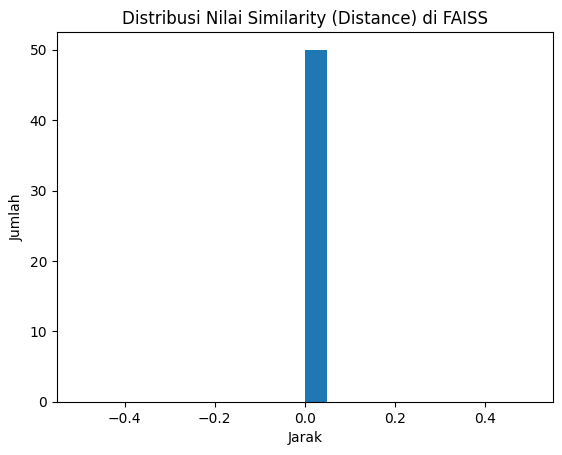

In [16]:
# Visualisasi Nilai Simililarity di FAISS
dist_list = []
for q in df_terjemahan['processed_context'].sample(50):
    q_emb = encode_text(q).reshape(1, -1)
    d, _ = index.search(q_emb, k=1)
    dist_list.append(d[0][0])

plt.hist(dist_list, bins=20)
plt.title("Distribusi Nilai Similarity (Distance) di FAISS")
plt.xlabel("Jarak")
plt.ylabel("Jumlah")
plt.show()

In [17]:
# Fungsi untuk mendapatkan respons chatbot berdasarkan pencarian similarity dengan ambang batas fallback
def get_semantic_chatbot_response_with_fallback(query, df, index, similarity_threshold=1.0):
    # Pra-pemrosesan dan encode query menjadi embedding (reshape ke 2D)
    query_emb = encode_text(preprocess_text(query)).reshape(1, -1)
    # Cari embedding terdekat dalam index FAISS
    distances, indices = index.search(query_emb, k=1)

    closest_distance = distances[0][0]  # Jarak similarity terdekat
    closest_idx = indices[0][0]         # Indeks data terdekat

    # Jika jarak similarity <= threshold, ambil jawaban sesuai indeks
    if closest_distance <= similarity_threshold:
        jawaban = df.iloc[closest_idx]['translated_response']
    else:
        # Jika tidak, berikan fallback response
        jawaban = "Maaf, aku kurang memahami maksudmu. Bisa kamu jelaskan lebih lanjut?"

    print(f"Similarity distance: {closest_distance:.4f}")
    return jawaban


In [18]:
print("\nUji Coba Mindfulness\n")

# Daftar Pertanyaan yang akan diuji
queries = [
    "Saya merasa sangat sedih.",
    "Butuh bantuan untuk mengatasi kecemasan",
    "Bagaimana seseorang memulai proses konseling?"
]

# Tentukan ambang batas similarity threshold
SIMILARITY_THRESHOLD = 50.0

for i, query in enumerate(queries, start=1):
    print(f"Query Pengguna {i}: {query}")
    response = get_semantic_chatbot_response_with_fallback(
        query, df_terjemahan, index, similarity_threshold=SIMILARITY_THRESHOLD
    )
    print(f"Mindfulness {i}: {response}\n")

print("Uji Coba Mindfulness selesai.")


Uji Coba Mindfulness

Query Pengguna 1: Saya merasa sangat sedih.
Similarity distance: 24.7189
Mindfulness 1: Cobalah melakukan sesuatu yang fisik. Jika Anda belum berolahraga sebelumnya, ada baiknya mendapatkan persetujuan dokter Anda terlebih dahulu, tetapi ini bisa membantu. Semakin banyak Anda dapat mencari tahu kapan Anda ingin memotong, semakin mudah untuk mencari tahu apa lagi yang dapat Anda lakukan. Jika Anda merasa sedih atau marah atau gugup, lihatlah apa yang mengarah pada perasaan itu dan berbicara dengan seseorang tentang itu. Anda mengatakan Anda sendirian. Saya akan melihat apakah Anda dapat menemukan seseorang yang dapat Anda percayai untuk berbicara tentang apa yang sedang Anda alami. Ini bisa menjadi orang tua, teman, seseorang di sekolah, rekan kerja, atau sejumlah orang lain.

Query Pengguna 2: Butuh bantuan untuk mengatasi kecemasan
Similarity distance: 44.2842
Mindfulness 2: Sesuatu yang berbeda bekerja untuk kita masing-masing. Ada jawaban luar yang memanjakan 

Simpan Model

In [19]:
faiss.write_index(index, 'mindfulness_index.faiss') # fa|iss

In [20]:
np.save('context_embeddings.npy', corpus_embeddings) # embedding

In [21]:
retriever_tokenizer.save_pretrained('mindfulness_tokenizer/') # Tokenizer Indobert

('mindfulness_tokenizer/tokenizer_config.json',
 'mindfulness_tokenizer/special_tokens_map.json',
 'mindfulness_tokenizer/vocab.txt',
 'mindfulness_tokenizer/added_tokens.json',
 'mindfulness_tokenizer/tokenizer.json')

In [22]:
import shutil

shutil.make_archive('mindfulness_tokenizer', 'zip', 'mindfulness_tokenizer')

'/content/mindfulness_tokenizer.zip'

In [23]:
!pip freeze > requirements.txt

In [24]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>